# PISA Data Exploration

**Author:** Tran Anh Tong

## Introduction

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Data Investiagion

Since the dataset provided has _636_ variables, we will begin our exploration by wrangling the data accordingly, in order to better understand which variables might be worth delving into.

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')

## Assessment

In [3]:
df.head(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,6,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00006,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
6,7,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00007,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
7,8,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00008,10,1,...,14.4599,14.6374,15.8728,15.8728,5.2248,15.2579,19,1,0.2322,22NOV13
8,9,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00009,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
9,10,Albania,0080000,ALB0005,Non-OECD,Albania,0000002,00010,10,1,...,3.3844,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13


In [4]:
df.shape

(485490, 636)

### Assessment

The set has **485,490 rows** representing individual students in the survey. There are **636 columns** that contain data about lots of different factors about the student, there they live, their economic, social, and cultural status, their attitudes about learning, and their performance on a panel of math, reading, and science assessments. Many of the qualitative columns contain string values that represent a scale. 

For my assessment, I will be using `ESCS` to represent student economic, social, and cultural status. I will do feature engineering to create new values to average each of the 5 math, reading, and science tests into single scores for each subject. I also investiage the time students spent on studying math, science and language. 

## Cleaning

In [5]:
df_clean = df.copy()

In [6]:
df_clean['NC'] = df_clean['NC'].apply(lambda x: x.strip())

### Overall Score

I decided to use the average of each of the five scores in each category as an score to compute the average of all scores as an overall score.

In [7]:
df_clean['PV1MATH']= df_clean['PV1MATH'].astype(float)
df_clean['PV2MATH']= df_clean['PV2MATH'].astype(float)
df_clean['PV3MATH']= df_clean['PV3MATH'].astype(float)
df_clean['PV4MATH']= df_clean['PV4MATH'].astype(float)
df_clean['PV5MATH']= df_clean['PV5MATH'].astype(float)

In [8]:
df_clean['PV1READ']= df_clean['PV1READ'].astype(float)
df_clean['PV2READ']= df_clean['PV2READ'].astype(float)
df_clean['PV3READ']= df_clean['PV3READ'].astype(float)
df_clean['PV4READ']= df_clean['PV4READ'].astype(float)
df_clean['PV5READ']= df_clean['PV5READ'].astype(float)

In [9]:
df_clean['PV1SCIE']= df_clean['PV1SCIE'].astype(float)
df_clean['PV2SCIE']= df_clean['PV2SCIE'].astype(float)
df_clean['PV3SCIE']= df_clean['PV3SCIE'].astype(float)
df_clean['PV4SCIE']= df_clean['PV4SCIE'].astype(float)
df_clean['PV5SCIE']= df_clean['PV5SCIE'].astype(float)

In [10]:
df_clean['math_score'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH']) / 5)


df_clean['read_score'] = (
    (df_clean['PV1READ'] + df_clean['PV2READ'] + df_clean['PV3READ'] +
     df_clean['PV4READ'] + df_clean['PV5READ']) / 5)


df_clean['sci_score'] = (
    (df_clean['PV1SCIE'] + df_clean['PV2SCIE'] + df_clean['PV3SCIE'] +
     df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 5)


df_clean['overall_score'] = (df_clean['math_score']+df_clean['read_score']+df_clean['sci_score'])/3

### Age Group Started Learning Language

In [11]:
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [12]:
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)

In [13]:
df_clean['ESCS']= df_clean['ESCS'].astype(float)
df_clean['OUTHOURS']= df_clean['LMINS'].astype(float)
df_clean['LMINS']= df_clean['LMINS'].astype(float)
df_clean['MMINS']= df_clean['MMINS'].astype(float)
df_clean['SMINS']= df_clean['SMINS'].astype(float)

### Remove unused columns

In [14]:
df_clean = df_clean[[
    'STIDSTD', 'NC', 'ESCS', 'EC06Q01', 'ST04Q01','COBN_S', 'overall_score',
    'math_score', 'read_score', 'sci_score', 'OUTHOURS','LMINS','MMINS','SMINS'
]]

In [15]:
df_clean.rename(columns={
    'STIDSTD': 'student_id',
    'NC': 'country',
    'EC06Q01': 'age_learn',
    'ST04Q01': 'gender',
    'COBN_S': 'birth_country',
    'OUTHOURS':'overall_time',
    'LMINS':'read_time',
    'MMINS':'math_time',
    'SMINS':'sci_time'
    
},
                inplace=True)

In [16]:
df_clean.head(10)

,student_id,country,ESCS,age_learn,gender,birth_country,overall_score,math_score,read_score,sci_score,overall_time,read_time,math_time,sci_time
0,00001,Albania,NaN,NaN,Female,Albania,333.038020,366.18634,261.01424,371.91348,NaN,NaN,NaN,NaN
1,00002,Albania,NaN,NaN,Female,Albania,444.458700,470.56396,384.68832,478.12382,315.0,315.0,270.0,90.0
2,00003,Albania,NaN,NaN,Female,Albania,465.776413,505.53824,405.18154,486.60946,300.0,300.0,NaN,NaN
3,00004,Albania,NaN,NaN,Female,Albania,460.296973,449.45476,477.46376,453.97240,135.0,135.0,135.0,90.0
4,00005,Albania,NaN,NaN,Female,Albania,336.223953,385.50398,256.01010,367.15778,NaN,NaN,NaN,NaN
5,00006,Albania,NaN,NaN,Female,Albania,359.383587,365.17370,337.42688,375.55018,NaN,NaN,NaN,NaN
6,00007,Albania,NaN,NaN,Female,Albania,451.144060,490.11528,372.13824,491.17866,135.0,135.0,225.0,90.0
7,00008,Albania,NaN,NaN,Male,Albania,539.268953,542.14830,516.59478,559.06378,NaN,NaN,NaN,NaN
8,00009,Albania,NaN,NaN,Female,Albania,369.075480,408.71634,326.78312,371.72698,NaN,NaN,NaN,NaN
9,00010,Albania,NaN,NaN,Female,Albania,392.655987,433.87600,401.92486,342.16710,240.0,240.0,90.0,270.0


In [17]:
df_clean.describe()

,ESCS,overall_score,math_score,read_score,sci_score,overall_time,read_time,math_time,sci_time
count,473648.000000,485490.000000,485490.000000,485490.000000,485490.000000,282866.000000,282866.000000,283303.000000,270914.000000
mean,-0.265546,472.488764,469.651234,472.006964,475.808094,219.276636,219.276636,226.007056,211.122460
std,1.131791,96.036271,100.786610,98.863310,97.998470,97.997730,97.997730,97.448421,131.368322
min,-5.950000,77.114593,54.767080,6.445400,25.158540,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,403.992595,396.019620,405.044200,405.762800,165.000000,165.000000,180.000000,120.000000
50%,-0.190000,472.046460,465.734520,475.477980,475.512860,200.000000,200.000000,220.000000,180.000000
75%,0.610000,541.455700,540.123060,542.831195,546.381920,250.000000,250.000000,250.000000,270.000000
max,3.690000,826.592027,903.107960,849.359740,857.832900,2400.000000,2400.000000,3000.000000,2975.000000


In [18]:
# Save file
df_clean.to_csv('pisa2012_clean.csv')

## Univariate Exploration

## Math, science, reading scores distribution

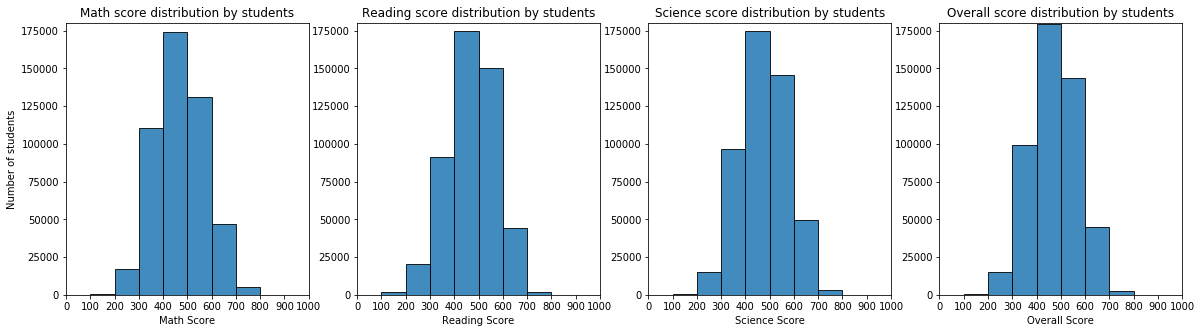

In [19]:
plt.figure(figsize = [20, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 4, 1)
plt.hist(df_clean['math_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Number of students')
plt.title("Math score distribution by students");

plt.subplot(1, 4, 2)
plt.hist(df_clean['read_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading score distribution by students");

plt.subplot(1, 4, 3)
plt.hist(df_clean['sci_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.title("Science score distribution by students");

plt.subplot(1, 4, 4)
plt.hist(df_clean['overall_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Overall Score');
plt.title("Overall score distribution by students");

From the above distributions, we find out that:

* The literacy scores are spread out in a clear, smooth unimodal distribution of values


* The vast majority of the students are scoring in each subject between 300 and 600 points, while a small portion of the total number achieves poorer (between 100 and 300 points) or greater (between 600 and 800 points) test performance


### Age Started Learning Language

Text(0.5, 0, 'Age groups')

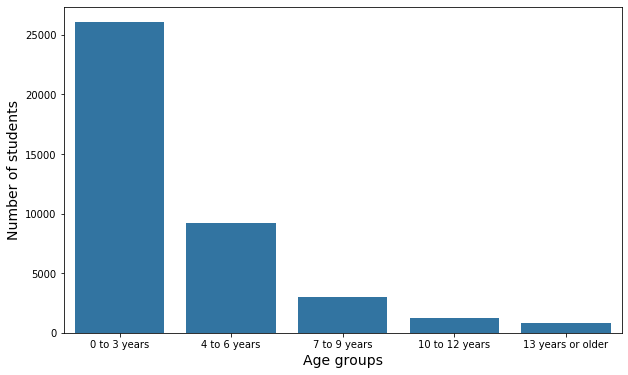

In [20]:
df_clean['age_learn'].value_counts(normalize = True)*100
base_color = sns.color_palette()[0]
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(data=df_clean, x='age_learn', color=base_color)
ax.set_ylabel("Number of students", fontsize=14)
ax.set_xlabel("Age groups", fontsize=14)

The group of students who start learning language from 0 to 3 years old was dominated in PISA test, occupying 64% of total students.

## Top 10 best countries have high scores in math, reading, science

Text(0.5, 1.0, 'Students with math score > 90 percentile')

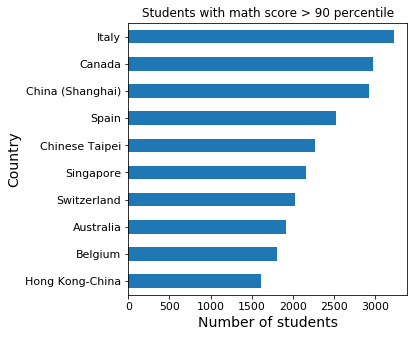

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
df_clean[df_clean['math_score'] > df_clean['math_score'].quantile(0.9)]['country'].value_counts(ascending=True).tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of students", fontsize=14)
ax.set_title ('Students with math score > 90 percentile')

Text(0.5, 1.0, 'Students with reading score > 90 percentile')

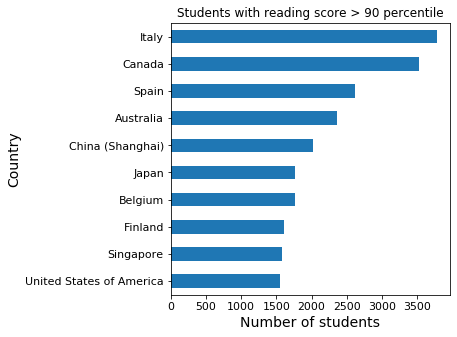

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
df_clean[df_clean['read_score'] > df_clean['read_score'].quantile(0.9)]['country'].value_counts(ascending=True).tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of students", fontsize=14)
ax.set_title ('Students with reading score > 90 percentile')

Text(0.5, 1.0, 'Students with science score > 90 percentile')

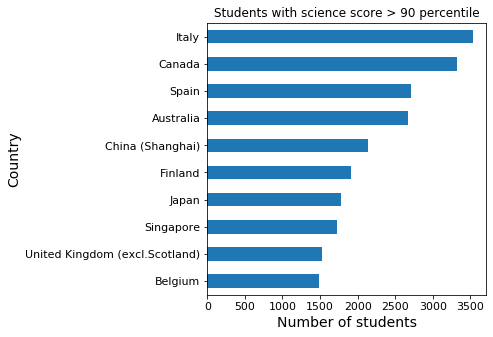

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
df_clean[df_clean['sci_score'] > df_clean['sci_score'].quantile(0.9)]['country'].value_counts(ascending=True).tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of students", fontsize=14)
ax.set_title ('Students with science score > 90 percentile')

We can see that Italy and Canada have the highest number of students who are above 90 percentile in math, reading and science scores.

## Bivariate Exploration

In [24]:
vars = ['ESCS', 'overall_score', 'math_score', 'read_score',
    'sci_score','overall_time']

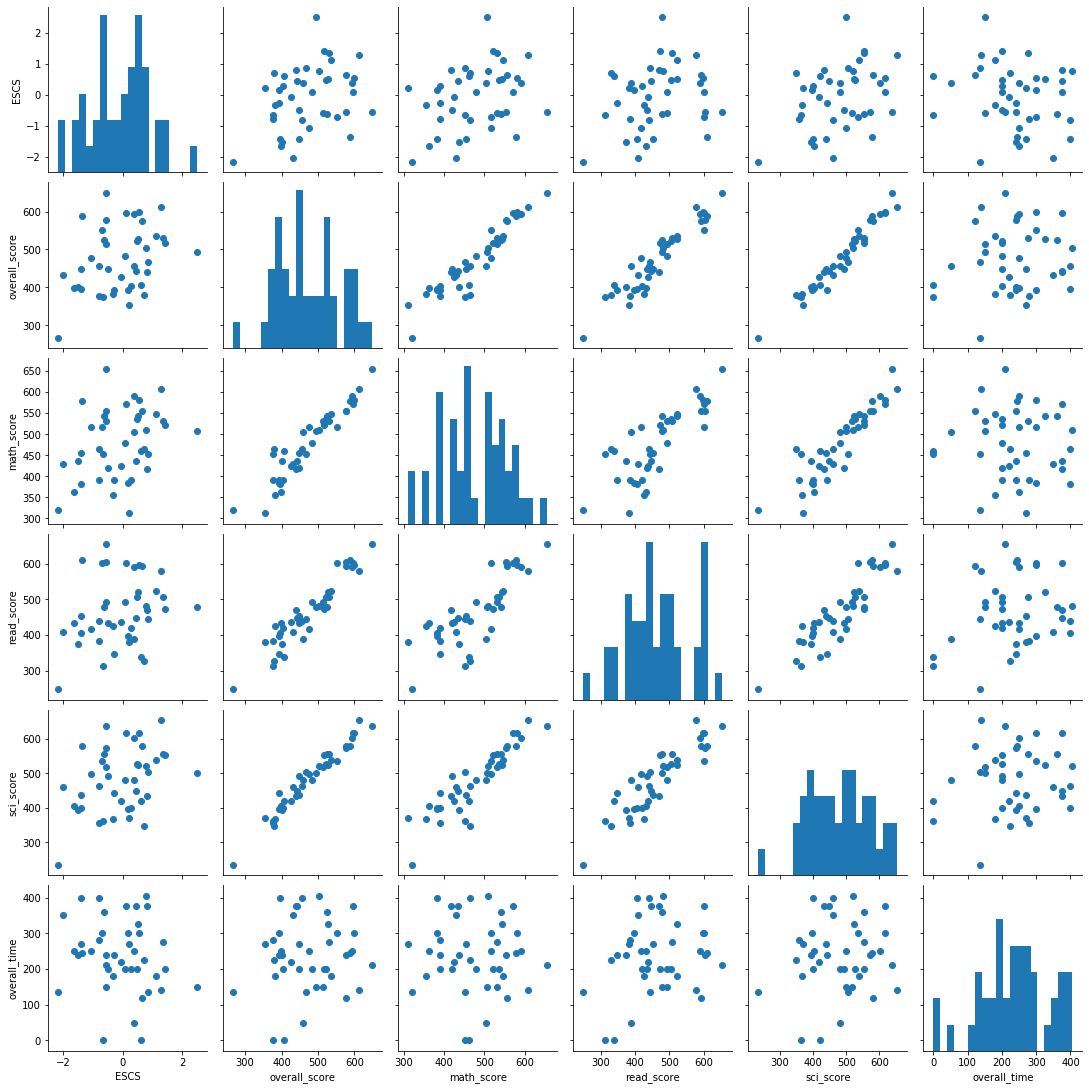

In [25]:
samp = np.random.choice(df_clean.shape[0], 1000, replace=False)
df_spl = df_clean.loc[samp, :]

g = sns.PairGrid(data=df_spl.dropna(), vars=vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.show()

We can see that there is a good correlation between the math, reading, and science literacy scores. ESCS has medium correlation with the academic scores.

## STEM Performance and Country Analysis 

Text(0.5, 1.0, 'Students with STEM score > 90 percentile')

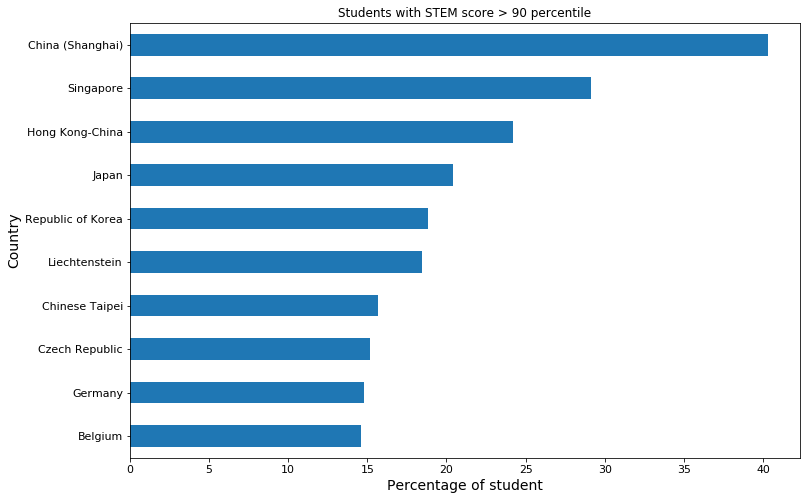

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean[(df_clean['sci_score'] > df_clean['sci_score'].quantile(0.9)) & 
               (df_clean['math_score']>df_clean['math_score'].quantile(0.9))].groupby('country')['country'].count()/
        df_clean.groupby('country')['student_id'].count()).sort_values()* 100
dt.dropna().tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of student", fontsize=14)
ax.set_title ('Students with STEM score > 90 percentile')

Asisan countries like China, Singapore are dominant in the Top 10 best countries in perfoming STEM tests (math and science), occupying 6 out of 10 places.

## STEM Performance and Gender Analysis 

Text(0.5, 1.0, 'Students with STEM score > 90 percentile')

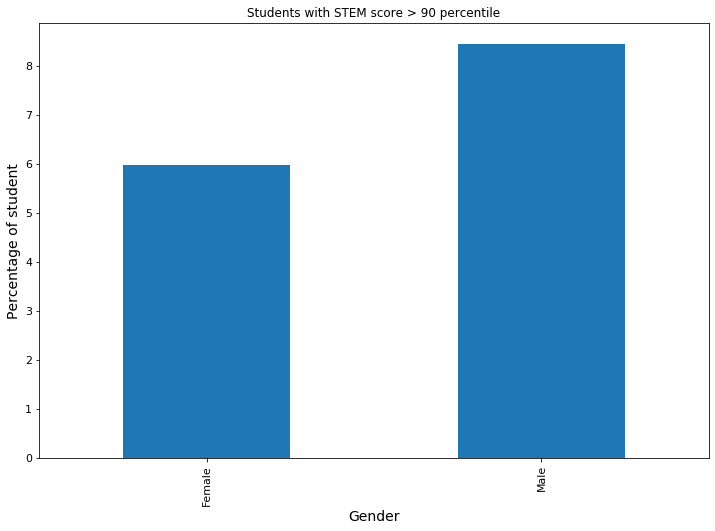

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean[(df_clean['sci_score'] > df_clean['sci_score'].quantile(0.9)) & 
               (df_clean['math_score']>df_clean['math_score'].quantile(0.9))].groupby('gender')['gender'].count()/
        df_clean.groupby('gender')['student_id'].count()).sort_values()* 100
dt.dropna().tail(10).plot(kind="bar", fontsize=11)
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Percentage of student", fontsize=14)
ax.set_title ('Students with STEM score > 90 percentile')

Male students performed better than female students in STEM tests.

### Reading Score and Age Started Learning Analysis

Text(0.5, 1.0, 'Reading Score by Age Started Learning')

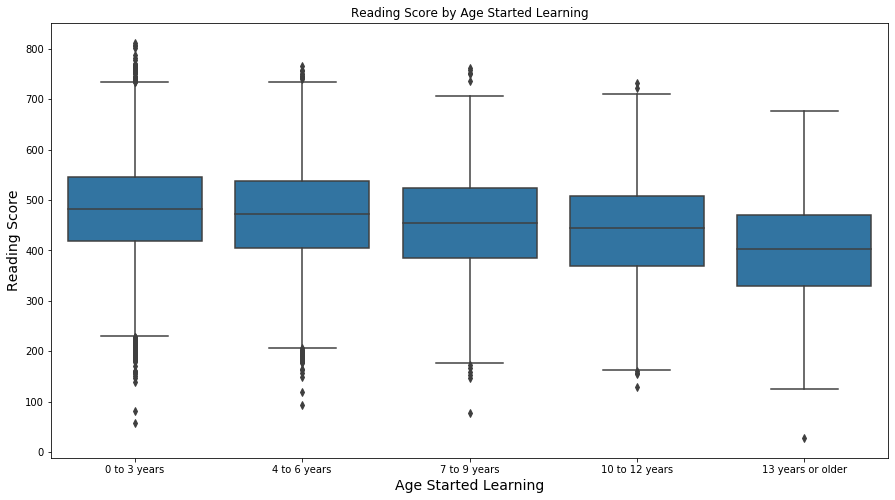

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(data=df_clean,
               x='age_learn',
               y='read_score',
               color=base_color)
ax.set_ylabel("Reading Score", fontsize=14)
ax.set_xlabel("Age Started Learning", fontsize=14)
ax.set_title("Reading Score by Age Started Learning")

We see that reading scores declines the longer a student goes before starting to learn. 

## Learning Time for Test Language, Mathematic, Science Analysis

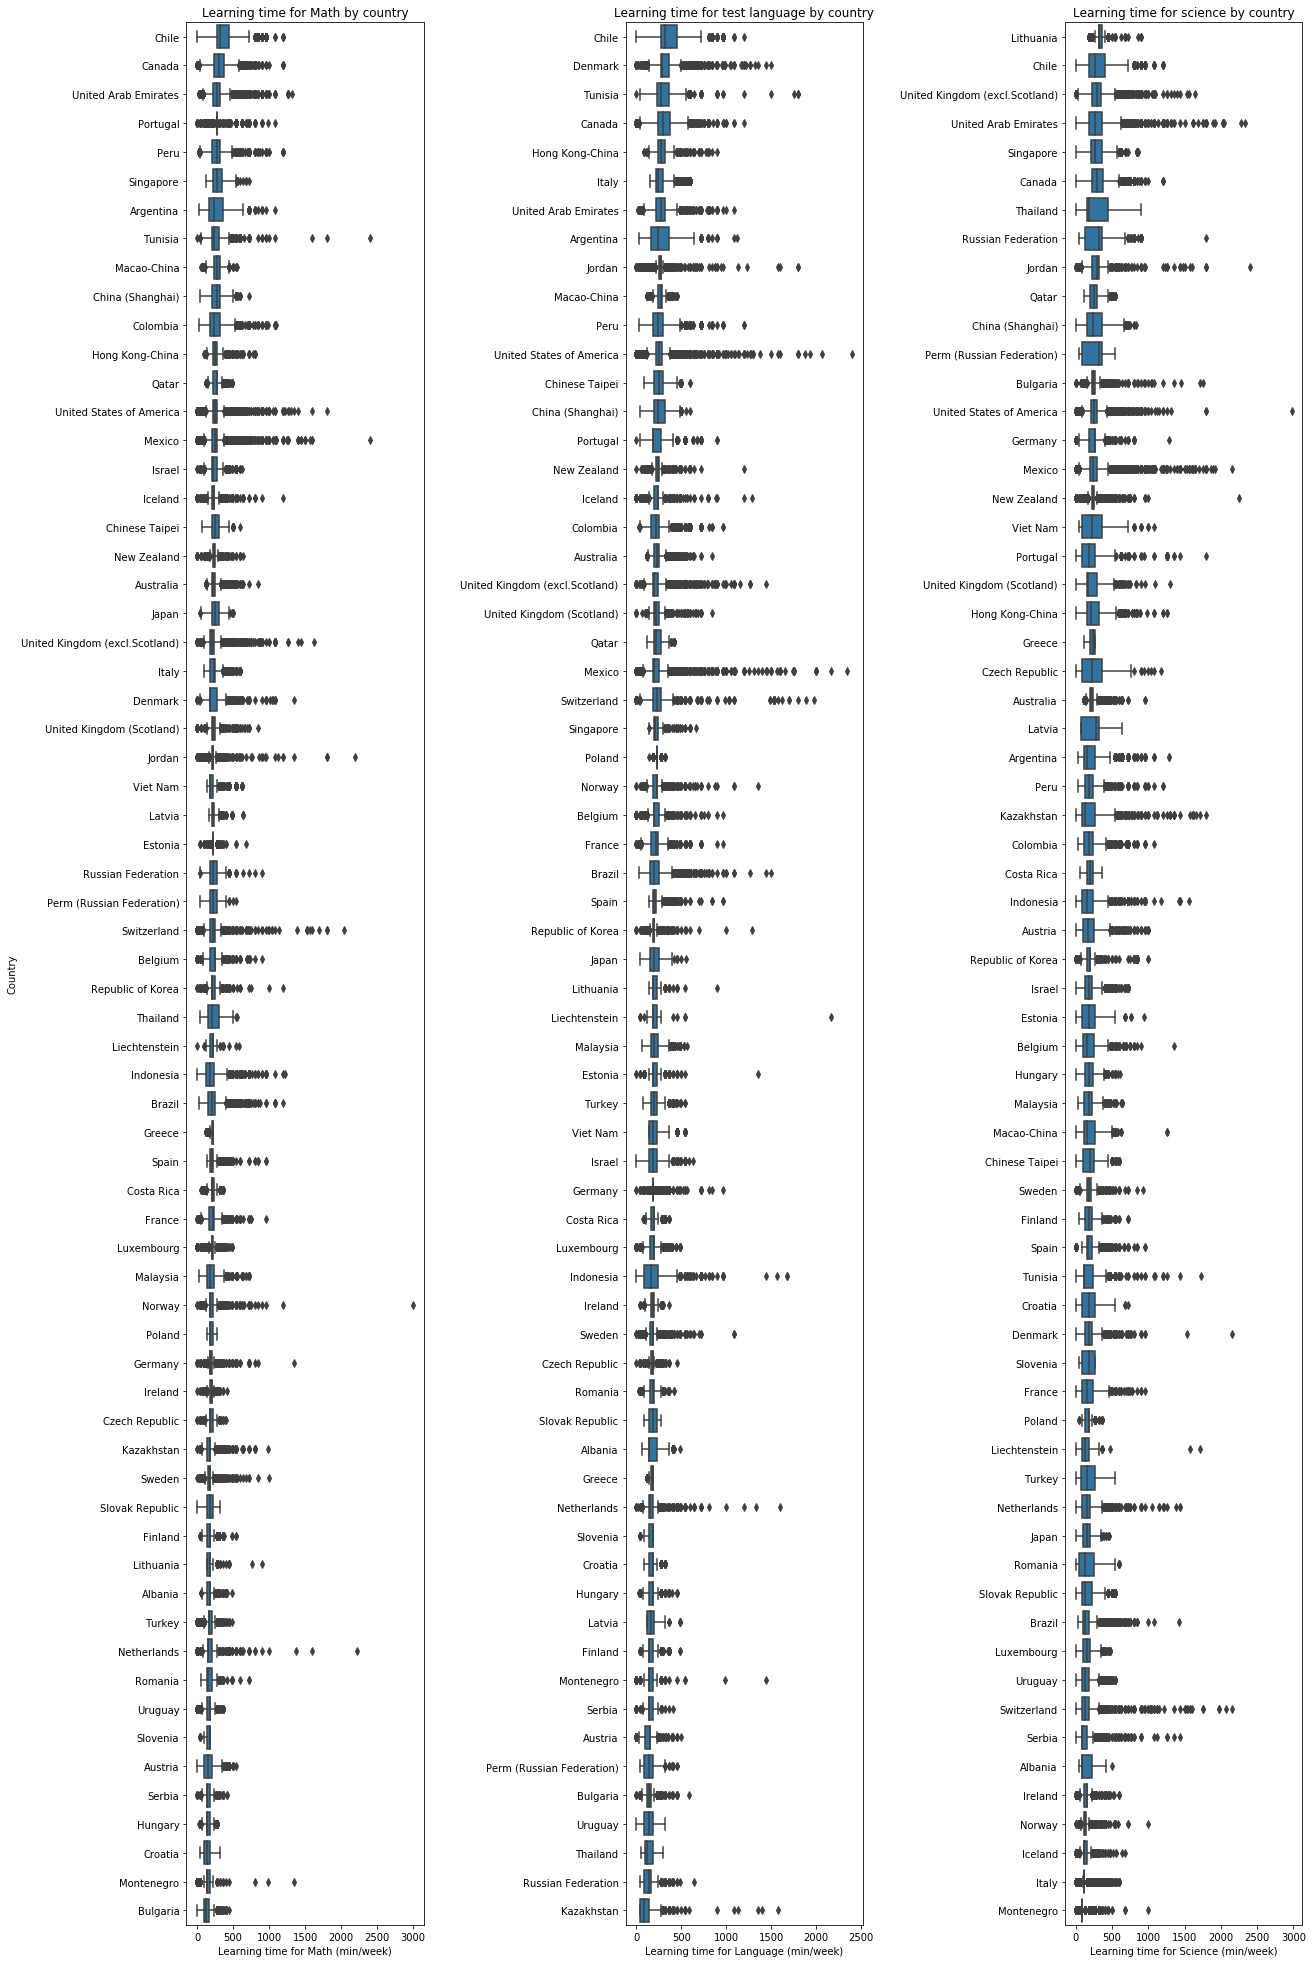

In [29]:
plt.figure(figsize = [20, 35])
plt.subplots_adjust(wspace = 0.85) 

math_order = df_clean.groupby('country')['math_time'].mean().sort_values(ascending = False).index
read_order = df_clean.groupby('country')['read_time'].mean().sort_values(ascending = False).index
sci_order = df_clean.groupby('country')['sci_time'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sns.boxplot(x = df_clean['math_time'], y = df_clean['country'], order = math_order, color = base_color);
plt.xlabel('Learning time for Math (min/week)')
plt.ylabel('Country')
plt.title('Learning time for Math by country');

plt.subplot(1, 3, 2)
sns.boxplot(x = df_clean['read_time'], y = df_clean['country'], order = read_order, color = base_color);
plt.xlabel('Learning time for Language (min/week)')
plt.ylabel(''); 
plt.title('Learning time for test language by country');

plt.subplot(1, 3, 3)
sns.boxplot(x = df_clean['sci_time'], y = df_clean['country'], order = sci_order, color = base_color);
plt.xlabel('Learning time for Science (min/week)')
plt.ylabel(''); 
plt.title('Learning time for science by country');

### Out-of-school study time and Country Analysis

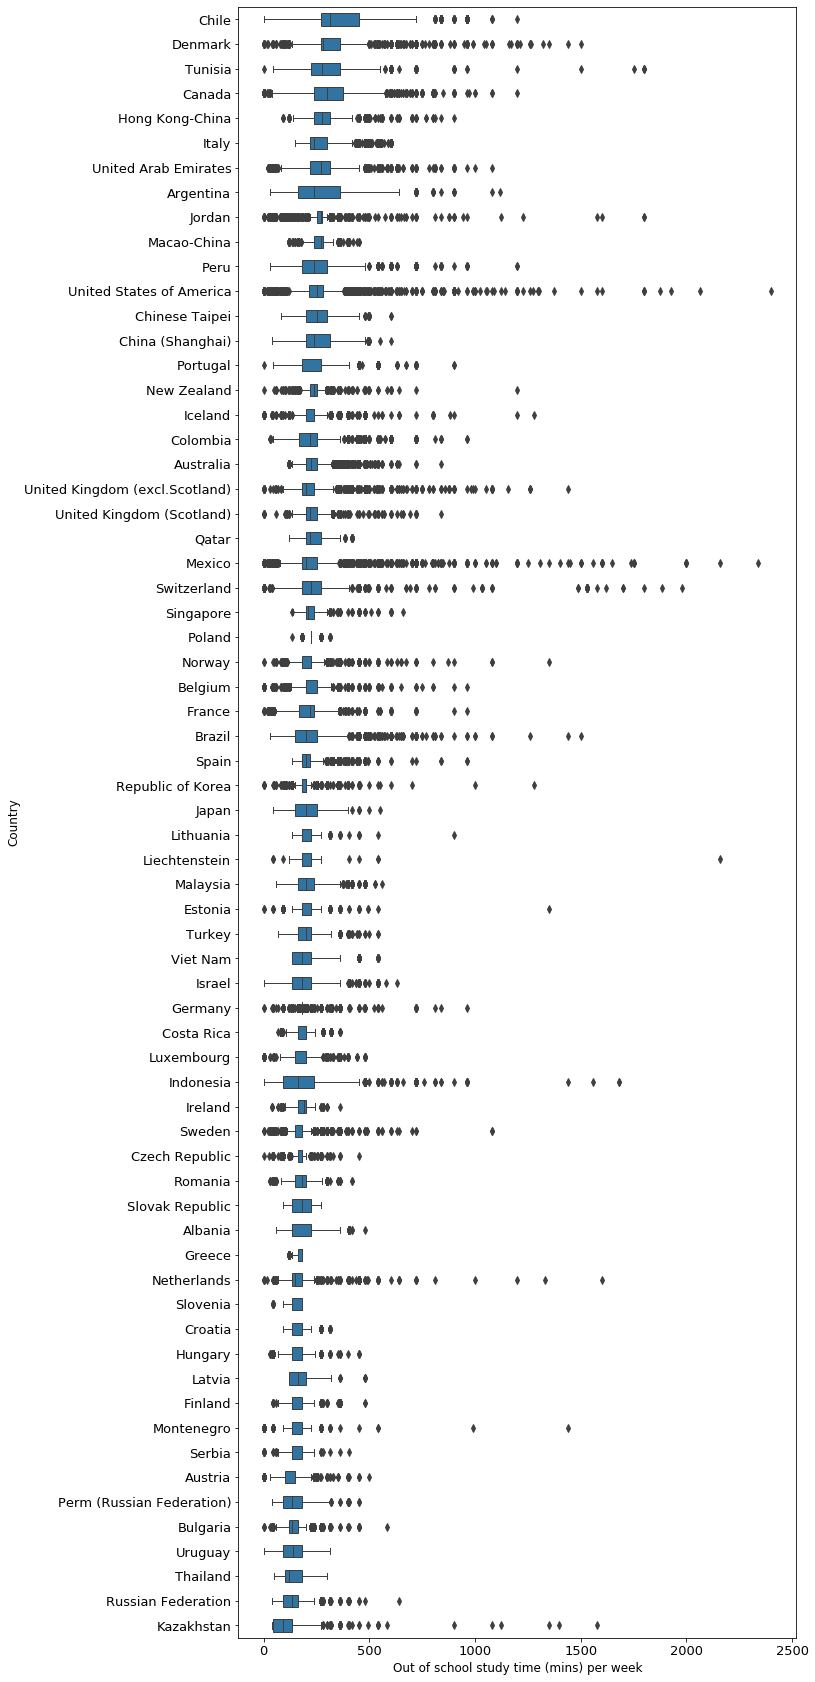

In [30]:
df_ana = df_clean.groupby('country')['overall_time'].mean().sort_values(
    ascending=False).dropna()

fig, ax = plt.subplots()
fig.set_size_inches(10, 30)
sns.boxplot(data=df_clean,
            y='country',
            x='overall_time',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            color=base_color,
            width=0.5,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("Out of school study time (mins) per week", fontsize=12)
ax.tick_params(labelsize=13)

Chilean students rank first in the list, with around 250 min/week spending on studying.

### Country, ESCS Analysis

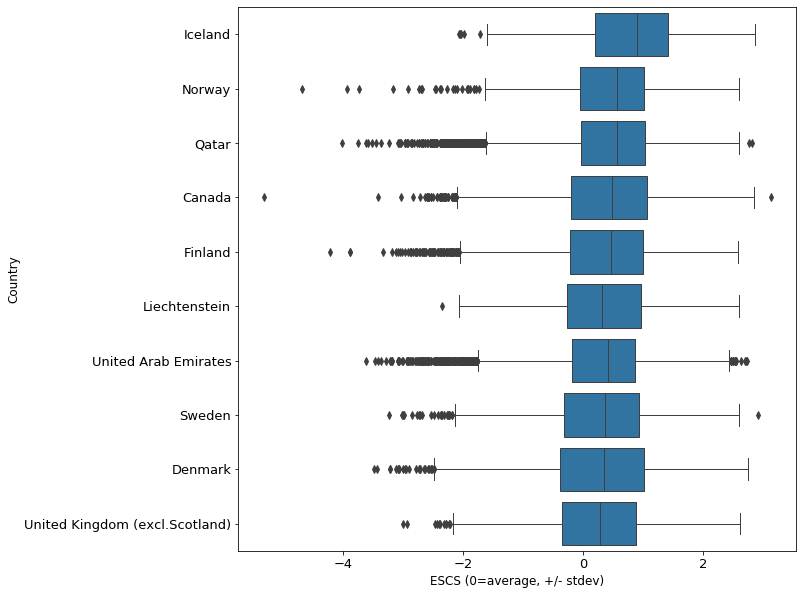

In [31]:
df_ana = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().head(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            color=base_color,
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
ax.tick_params(labelsize=13)

## Multivariate Exploration

### Gender, Age Started Learning Language, and Reading Score Analysis

Text(0.5, 0, 'Age Started Learning Language')

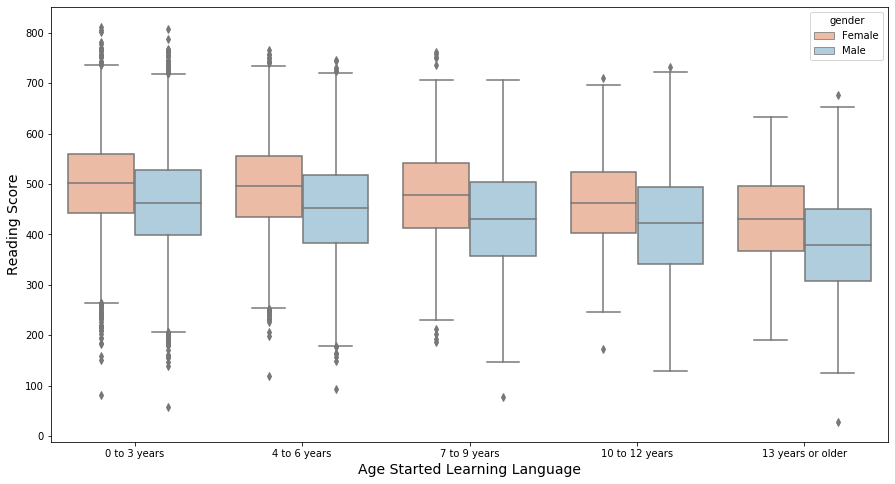

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(data=df_clean,
            x='age_learn',
            y='read_score',
            palette='RdBu',
            hue='gender')
ax.set_ylabel("Reading Score", fontsize=14)
ax.set_xlabel("Age Started Learning Language", fontsize=14)

We can see that reading performance of students learned the test language later is lower than other groups of student. Notice that the test subjects were 15-year-olds, meaning that students who only started learning the test language at 13 years or older had fewer than two years of familiarity with the language at test time.

Female students performed better than male students, and the performance gap between female and male students seems to increase the later students first began learning the language.

### Birth Country, Age Started Learning Language, and Reading Score Analysis

In [33]:
df_clean['birth_recent']=(df_clean['birth_country']!=df_clean['country']).dropna().astype(int);

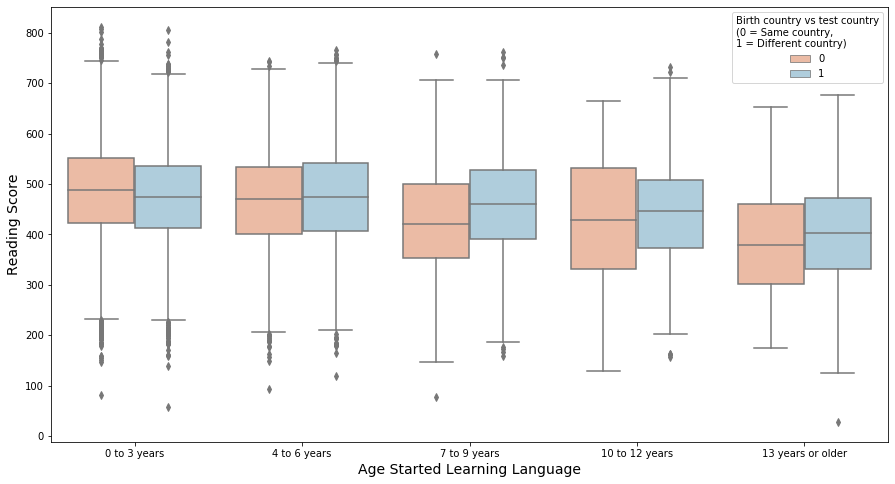

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(data=df_clean,
            x='age_learn',
            y='read_score',
            palette='RdBu',
            hue='birth_recent')
ax.set_ylabel("Reading Score", fontsize=14)
ax.set_xlabel("Age Started Learning Language", fontsize=14)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Birth country vs test country\n(0 = Same country,\n1 = Different country)')

As said before, the sooner students study languague, the better performance they can obtain. 

## Conclusion:

**How do students perform in Math, Reading and Science literacy?** 

The vast majority of the students are scoring in each subject between 300 and 600 points, while a small portion of the total number achieves poorer (between 100 and 300 points) or greater (between 600 and 800 points) test performance. For each of these three score distributions, most students fitted within the interval of scores between 400 and 500 points.
    
    
**Does any country or gender excel in STEM tests (math and science)?**

Generally, we have seen Asian countries as being the world leaders at educating students who perform exceptionally in STEM tests. China, Singapore, Japan and Korea are typical examples. And male students appear to perform better than female students in STEM tests but inversely female students performed better than male students in reading test.
    
    
**Do students who have different backgrounds (ESCS) perform differently in PISA test**

We have discovered that students who come from countries of high ESCS have more advantage to obtain slightly higher scores in all three measured subjects.

**Does the age started learning the languagge which is used in the tests impact students' performance?**

We can see that reading performance of students learned the test language sonner is higher than students learned the language lately.
